In [124]:
from temporal_walk import LinearRandomPicker, ExponentialRandomPicker, UniformRandomPicker

In [125]:
N_TRIALS = 1_000_000
HI = 20

In [126]:
def test_pickers(picker, prioritize_end, hi, n_trials=N_TRIALS):
    counts = [0] * hi
    
    for _ in range(n_trials):
        picked_num = picker.pick_random(0, hi, prioritize_end)
        counts[picked_num] += 1
    
    return counts

In [127]:
import matplotlib.pyplot as plt

def plot_number_picked(counts):
    plt.plot(counts)
    
    plt.xlabel('Number')
    plt.ylabel('Times Picked')
    
    plt.show()

In [128]:
counts_linear_end_prioritized = test_pickers(LinearRandomPicker(), True, hi=HI)

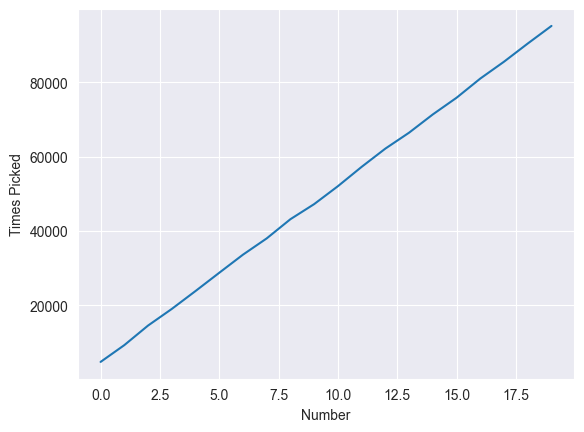

In [129]:
plot_number_picked(counts_linear_end_prioritized)

In [130]:
counts_linear_start_prioritized = test_pickers(LinearRandomPicker(), False, hi=HI)

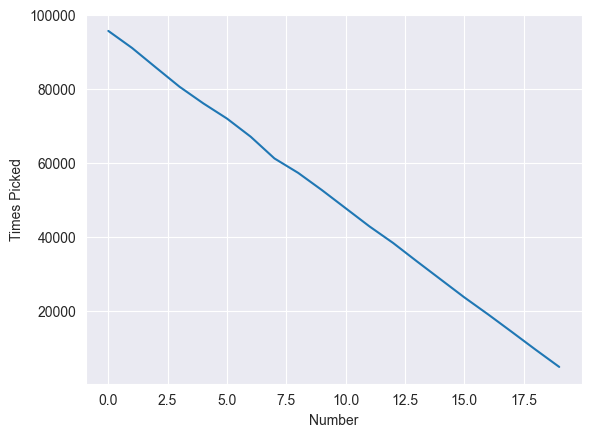

In [131]:
plot_number_picked(counts_linear_start_prioritized)

In [132]:
import numpy as np

class PyExponentialRandomPicker:
    def __init__(self, decay_rate=1.0):
        self.decay_rate = decay_rate

    def pick_random(self, start, end, prioritize_end=True):
        if start >= end:
            raise ValueError("Start must be less than end.")
        
        length = end - start
        indices = np.arange(length)
    
        if prioritize_end:
            weights = np.exp(self.decay_rate * indices)
        else:
            weights = np.exp(-self.decay_rate * indices)
    
        probabilities = weights / weights.sum()
        random_index = np.random.choice(indices, p=probabilities)
    
        return start + random_index

In [133]:
counts_exp_end_prioritized = test_pickers(ExponentialRandomPicker(), True, hi=HI)

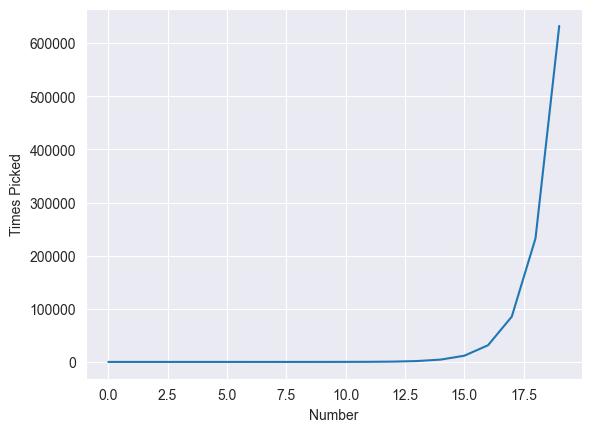

In [134]:
plot_number_picked(counts_exp_end_prioritized)

In [135]:
counts_exp_py_end_prioritized = test_pickers(PyExponentialRandomPicker(), True, hi=HI)

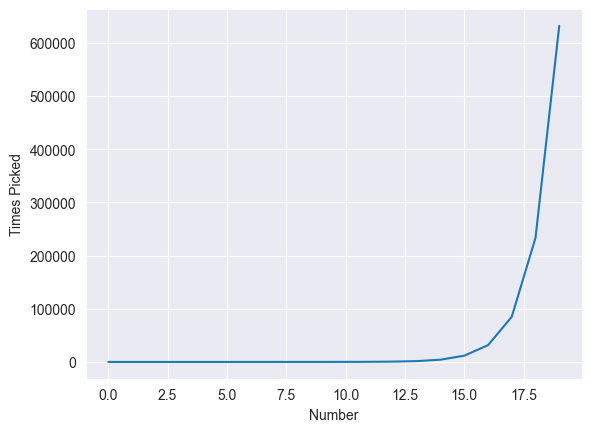

In [136]:
plot_number_picked(counts_exp_py_end_prioritized)

In [137]:
counts_exp_start_prioritized = test_pickers(ExponentialRandomPicker(), False, hi=HI)

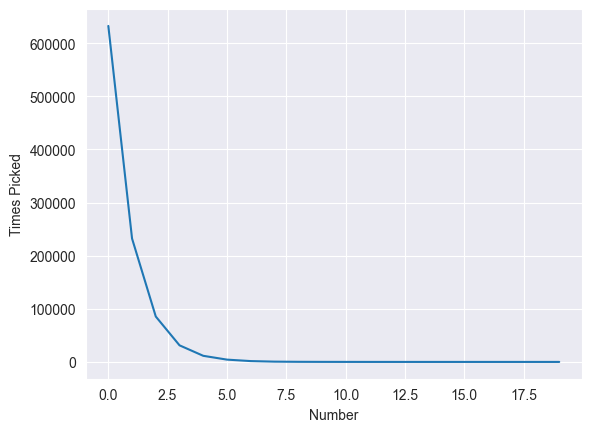

In [138]:
plot_number_picked(counts_exp_start_prioritized)

In [139]:
counts_exp_py_start_prioritized = test_pickers(PyExponentialRandomPicker(), False, hi=HI)

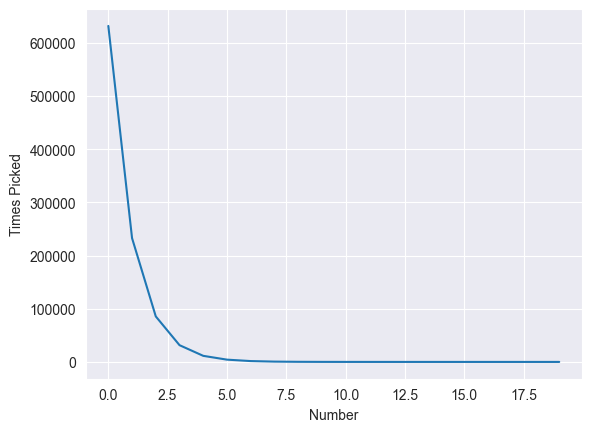

In [140]:
plot_number_picked(counts_exp_py_start_prioritized)

In [141]:
counts_uniform_end_prioritized = test_pickers(UniformRandomPicker(), True, hi=HI)

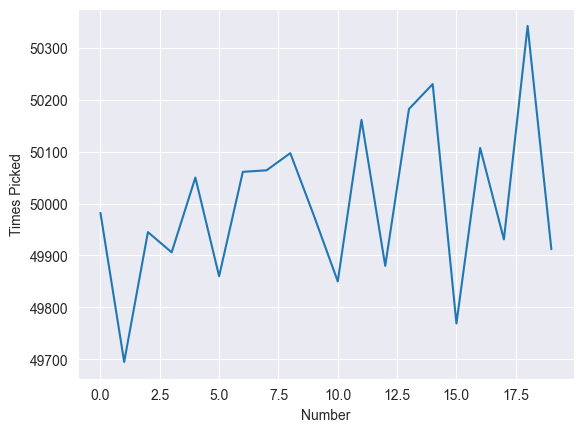

In [142]:
plot_number_picked(counts_uniform_end_prioritized)

In [143]:
counts_uniform_start_prioritized = test_pickers(UniformRandomPicker(), False, hi=HI)

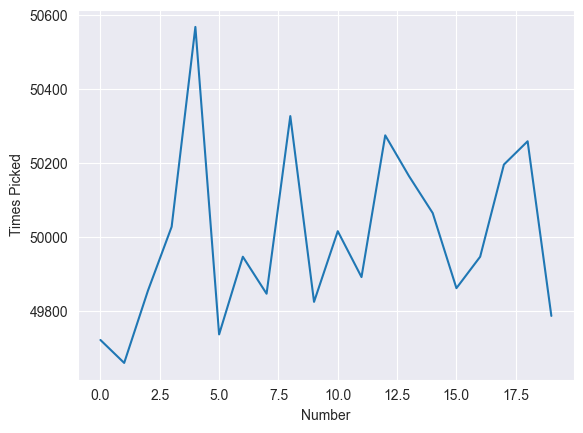

In [144]:
plot_number_picked(counts_uniform_start_prioritized)